<a href="https://colab.research.google.com/github/BilalAsifB/Computer_Vision_Labs/blob/main/CV_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from skimage.feature import hog
from skimage import exposure, feature
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio
from IPython.display import Image
from google.colab.patches import cv2_imshow

## 1. Medical Image Analysis for Tumor Detection (Code &amp; Description)
You are part of a medical research team working on a project to detect tumors in medical images, specifically
mammograms. Feature extraction plays a critical role in identifying potential tumor regions.
* Explain how the concept of edge detection can be applied as a feature extraction technique for tumor
detection in mammograms. Provide a step-by-step description of how edge detection can be used in this
context.
* In addition to edge detection, propose one more feature extraction technique that can enhance tumor detection
in medical images. Describe this technique, its working mechanism, and why it is suitable for this task.

These questions focus on feature extraction techniques and their application in different domains, encouraging the
understanding of how to choose and apply appropriate techniques for specific image analysis tasks.

## Answer:

#### **1. Edge Detection for Tumor Detection in Mammograms**

Edge detection is used to find boundaries in images where there’s a sudden change in intensity. In mammograms, it helps outline tumors since they usually appear with different brightness or texture than the surrounding tissue.

**Steps:**

1. First, get the mammogram and convert it to grayscale. Do some preprocessing like blurring to remove noise and improving contrast.
2. Apply an edge detector like Canny or Sobel to find the sharp changes in intensity — these represent potential tumor edges.
3. Clean up the edge map using morphological operations to remove small noisy edges and connect broken ones.
4. Extract contours from the edge map which may represent tumor boundaries.
5. Compute simple shape features (like area, circularity, or irregularity). Tumors usually have rough or spiculated edges, unlike smooth normal tissue.
6. Use these edge-based features in a classifier or as input for further analysis.

So basically, edge detection helps spot and outline abnormal regions which could be tumors.

---

#### **2. Additional Technique: Gabor Filter-Based Texture Analysis**

Another technique is using Gabor filters, which are good for capturing texture and pattern information in images.

**How it works:**

1. Gabor filters are made by combining a sinusoidal wave with a Gaussian function.
2. The image is passed through several Gabor filters with different angles and scales.
3. Each filter responds strongly to certain patterns or textures.
4. The average or energy of these responses becomes the texture feature.

This is useful because tumor regions usually have uneven or coarse textures, while healthy tissue looks smoother. Gabor filters can catch those differences in texture and direction, making them great for detecting abnormal tissue areas in mammograms.

## 2. Lab Task 1:
#### **Harris Corner Detection**
You are working on an image processing project where you need to detect corners in an image. You decide to use
the Harris Corner Detection method. Perform the following tasks:
* Load an image (you can use any image you prefer).
* Implement the Harris Corner Detection algorithm to detect corners in the image.
* Display the original image with the detected corners marked as red points.
* Experiment with different threshold values and observe how they affect the corner detection results.

In [ ]:
img = cv2.imread('/content/funny_img.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
block_size = 2
k = 0.04

In [ ]:
corner_scores = cv2.cornerHarris(img, block_size, 3, k)

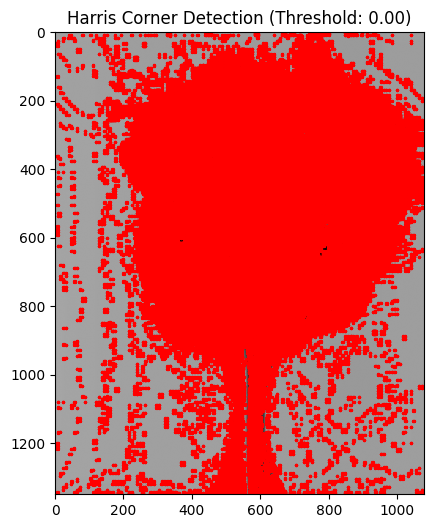

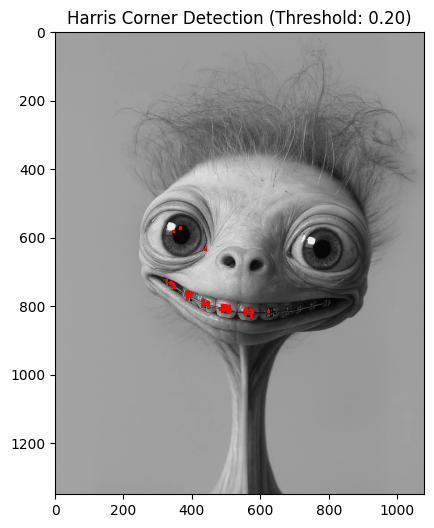

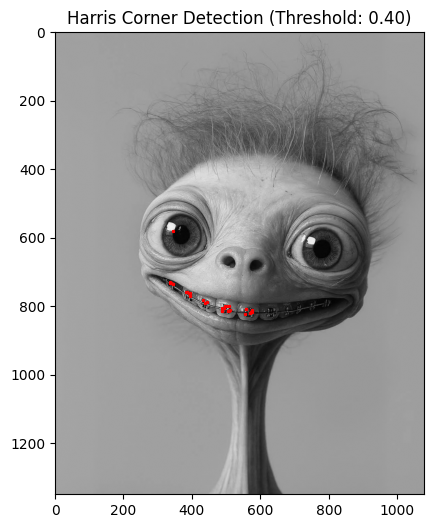

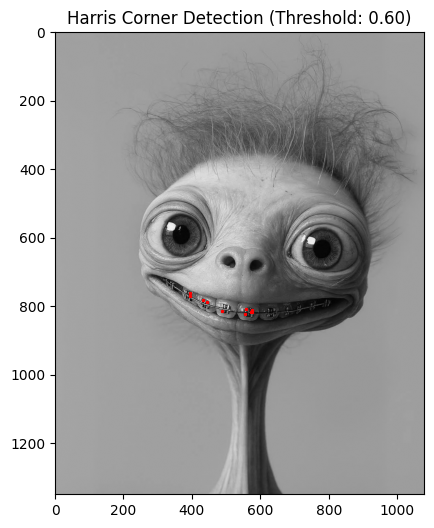

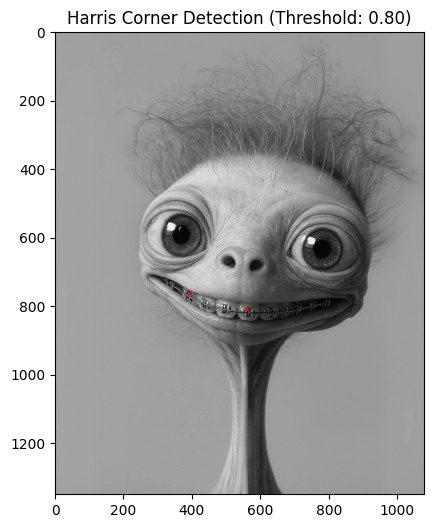

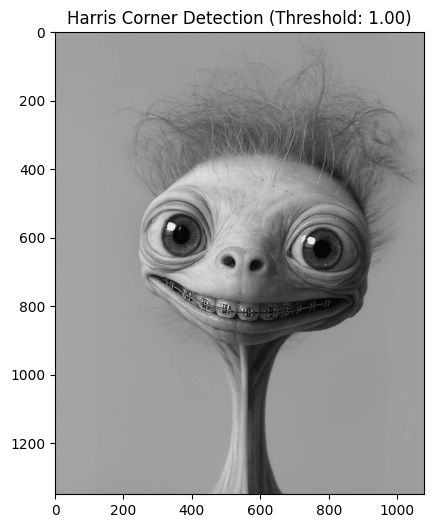

In [ ]:
for i in np.arange(0.0, 1.01, 0.2):
    threshold = i * corner_scores.max()
    corners = np.where(corner_scores > threshold)

    plt.figure(figsize=(12, 6))
    plt.imshow(img, cmap='gray')
    plt.plot(corners[1], corners[0], 'r*', markersize=2)
    plt.title(f"Harris Corner Detection (Threshold: {i:.2f})")
    plt.show()

## 3. Lab Task 3:
#### **Corner Detection in Real-time Video**
You are working on a real-time computer vision application where you need to detect corners in a live video
stream. Implement corner detection in real-time using the Harris or Shi-Tomasi method. Perform the following
tasks:
* Access the video feed from your computer's webcam or use a pre-recorded video.
* Implement either the Harris or Shi-Tomasi Corner Detection algorithm to process the video frames and
detect corners.
* Display the live video stream with the detected corners marked as points in real-time.
* Experiment with different parameters to optimize corner detection for real-time processing.

In [ ]:
gif_reader = imageio.get_reader("/content/spongebob_gif.gif")

In [ ]:
frames = []
for frame in gif_reader:
    frames.append(cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR))

In [ ]:
processed_frames = []

for frame in frames:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    if corners is not None:
        corners = np.intp(corners)

        for c in corners:
            x, y = c.ravel()
            cv2.circle(frame, (x, y), 3, (0, 0, 255), -1)

    processed_frames.append(frame)

In [ ]:
height, width, _ = processed_frames[0].shape
out_path = "corners.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(out_path, fourcc, 15, (width, height))  # 15 FPS

for f in processed_frames:
    out.write(f)
out.release()

In [ ]:
# Download the output video to view the results.

## 4. Lab Task 4:
#### **Corner Detection for Image Stitching**
You are developing an image stitching application that combines multiple images into a panorama. Corner
detection is a crucial step for finding matching features between images. Perform the following tasks:
* Choose multiple images that you want to stitch together to create a panorama.
* Implement either the Harris or Shi-Tomasi Corner Detection algorithm to detect corners in each image.
* Display each image with the detected corners marked as points.
* Use the detected corners as key features for image matching and stitching.

In [ ]:
img_1 = cv2.imread("/content/landscape_1.jpeg")
img_2 = cv2.imread("/content/landscape_2.jpeg")
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [ ]:
corners_1 = cv2.goodFeaturesToTrack(img_1_gray, maxCorners=200, qualityLevel=0.01, minDistance=10)
corners_2 = cv2.goodFeaturesToTrack(img_2_gray, maxCorners=200, qualityLevel=0.01, minDistance=10)

# Check if corners were detected before converting to integers
if corners_1 is not None:
    corners_1 = np.intp(corners_1)
if corners_2 is not None:
    corners_2 = np.intp(corners_2)

In [ ]:
for i in corners_1:
    x, y = i.ravel()
    cv2.circle(img_1, (x, y), 4, (0, 0, 255), 3)

for i in corners_2:
    x, y = i.ravel()
    cv2.circle(img_2, (x, y), 4, (0, 0, 255), 3)

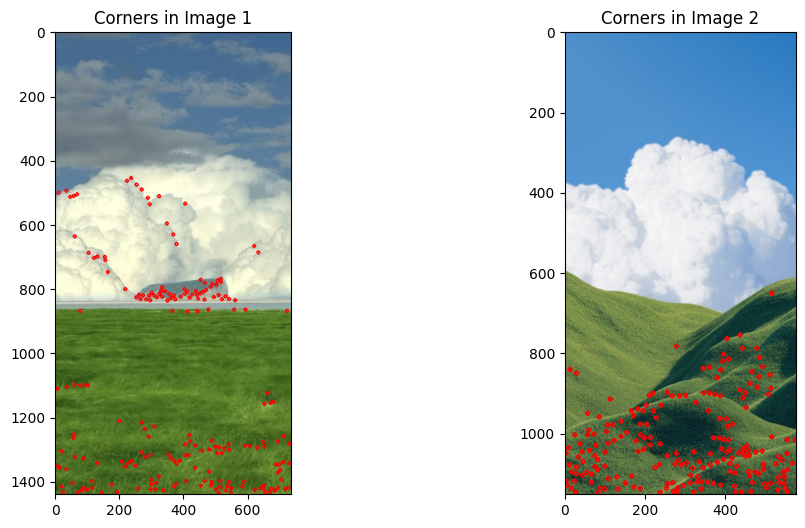

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title('Corners in Image 1')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.title('Corners in Image 2')
plt.show()

In [ ]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img_1_gray, None)
kp2, des2 = orb.detectAndCompute(img_2_gray, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

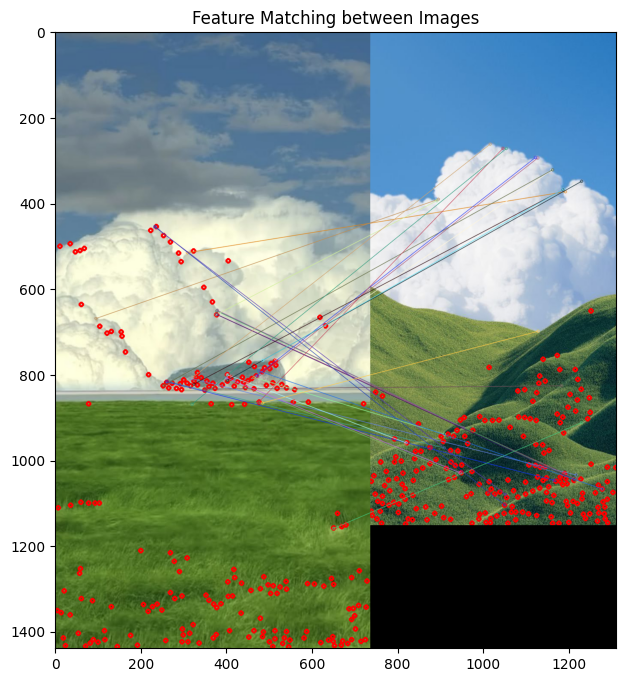

In [ ]:
match_img = cv2.drawMatches(img_1, kp1, img_2, kp2, matches[:30], None, flags=2)

plt.figure(figsize=(15,8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching between Images")
plt.show()

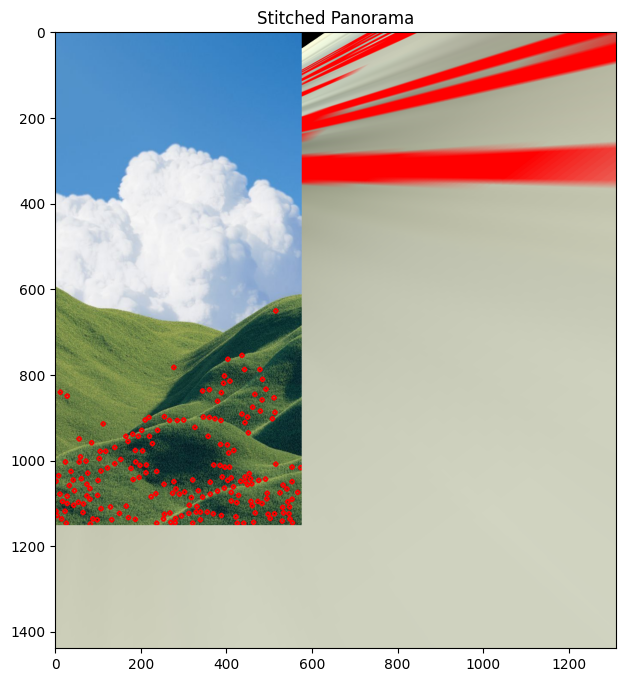

In [ ]:
if len(matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    result = cv2.warpPerspective(img_1, H, (img_1.shape[1] + img_2.shape[1], img_1.shape[0]))
    result[0:img_2.shape[0], 0:img_2.shape[1]] = img_2

    plt.figure(figsize=(15,8))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Stitched Panorama")
    plt.show()
else:
    print("Not enough matches found for homography.")

## 5. Lab Task:
#### **Feature Detection and Matching using ORB Detector**
You are working on a computer vision project that involves detecting and matching features between two images.
You decide to use the ORB (Oriented FAST and Rotated BRIEF) detector and descriptor for this task.
**Task Instructions:**
* Load Images:
* Select two different images (e.g., natural scenes, objects, or patterns) that have some common features but
may have variations like rotation, scaling, or perspective changes.
* Load both images using OpenCV.
**Feature Detection with ORB:**
* Implement the ORB feature detector and descriptor using OpenCV.
* Detect key points and compute descriptors for both images using ORB.
* Matching Features:
* Implement feature matching using the Brute-Force Matcher or FLANN (Fast Library for Approximate
Nearest Neighbors) Matcher.
**Match the descriptors of key points between the two images:**
* Draw Matches:
* Draw the matches between key points on a new image to visualize the feature matches.
* You can use lines or circles to connect matched points.
* Display Results.
**Display the following:**
* The two original images side by side.
* The image with key points marked (you can use circles to represent key points).
* The image with matched key points marked (showing the connections between matching points).
* Experiment and Analysis:
* Experiment with different sets of images with varying transformations (rotation, scaling, perspective changes)
to observe how well ORB handles feature matching.
* Analyze the performance of ORB in terms of robustness and accuracy in matching features.
**Expected Output:**
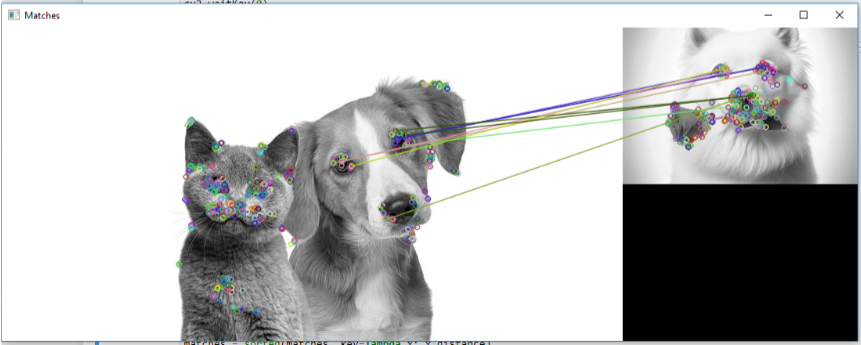

In [2]:
img_1 = cv2.imread("/content/landscape_1.jpeg")
img_2 = cv2.imread("/content/landscape_2.jpeg")
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [3]:
orb = cv2.ORB_create()

In [4]:
key_points1, descriptors1 = orb.detectAndCompute(img_1_gray, None)
key_points2, descriptors2 = orb.detectAndCompute(img_2_gray, None)

In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [7]:
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

In [15]:
match_img = cv2.drawMatches(
    img_1, key_points1, img_2, key_points2, matches, None, flags=2
)

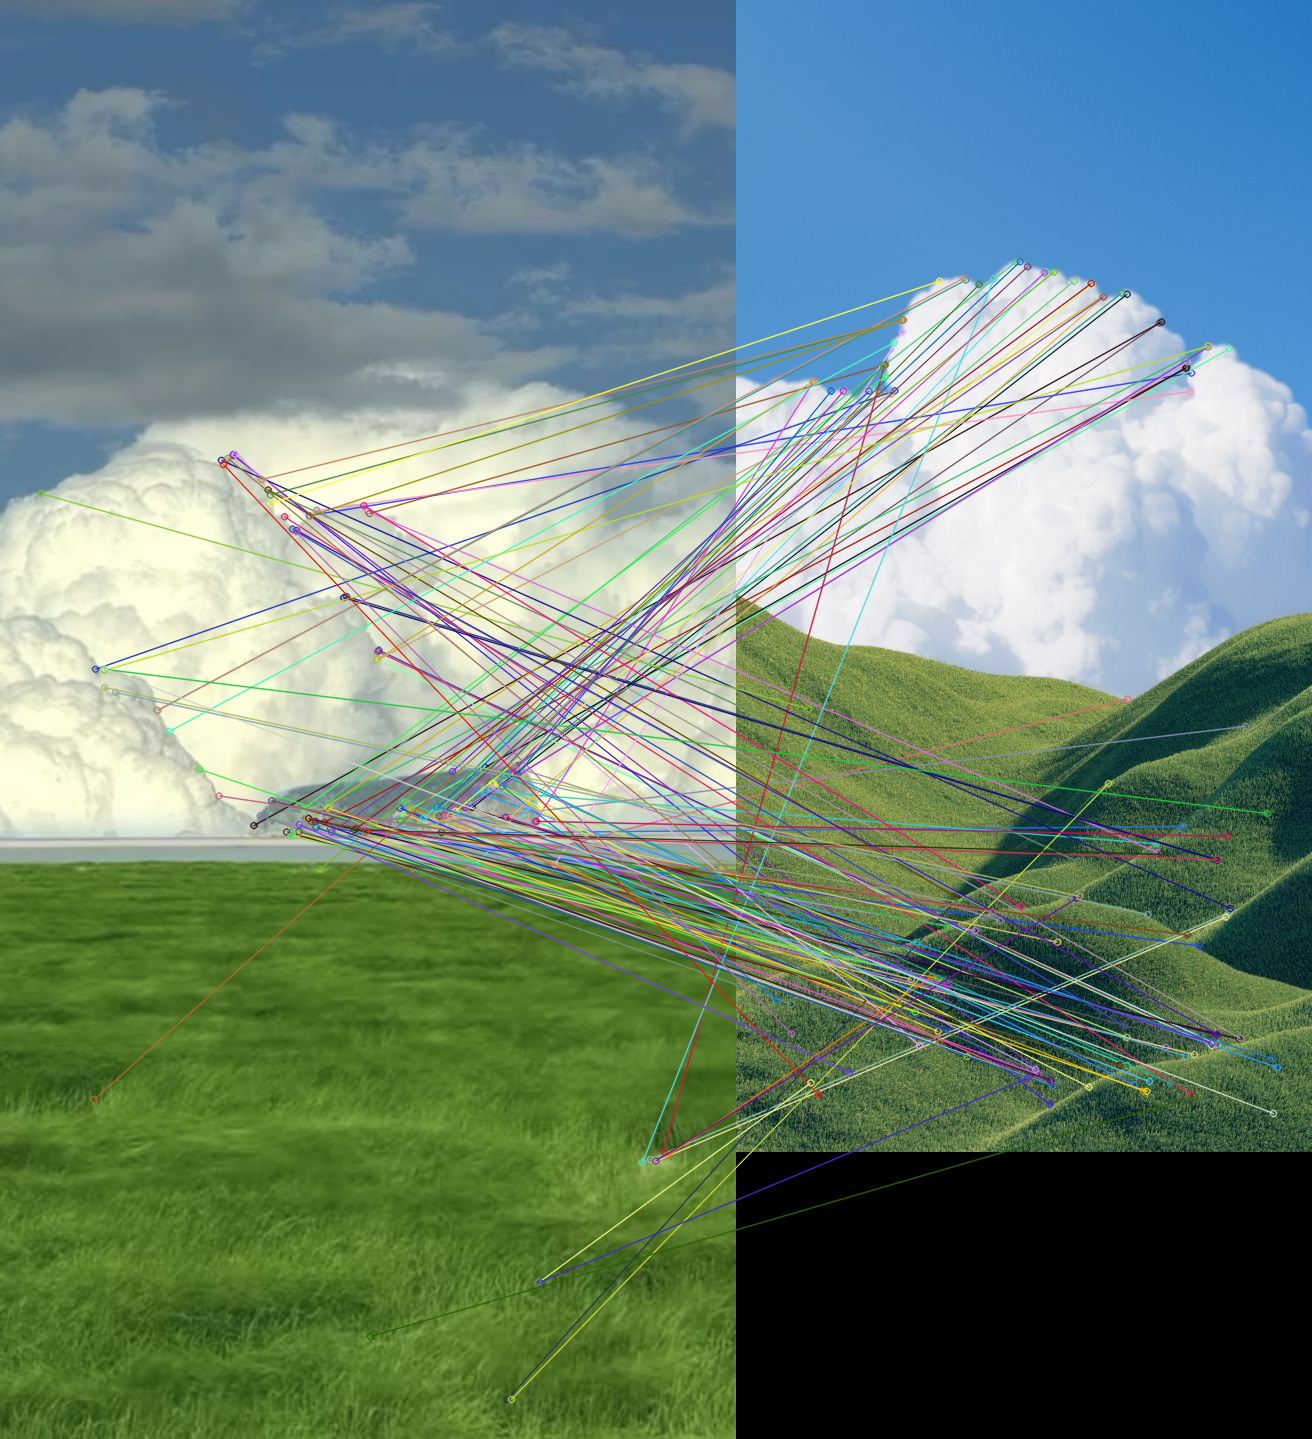

In [16]:
cv2_imshow(match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()